<a href="https://colab.research.google.com/github/StephenTGibson/COMP527-colabNotebooks/blob/main/metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Metric used for Model Evaluation
1.1 Confusion Matrix

refercence
1. [Visualizations with Display Objects](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py)

We load a blood transfusion service center data set from OpenML. This is a binary classification problem where the target is whether an individual donated blood. 

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=0)
print(y_test)


we create and trian a Logistic Regression Model to make preditions:

In [ ]:
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

Let's see the model's performance:

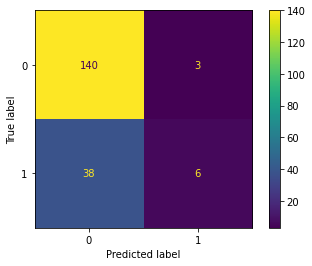

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

1.2 Precision-Recall Curve

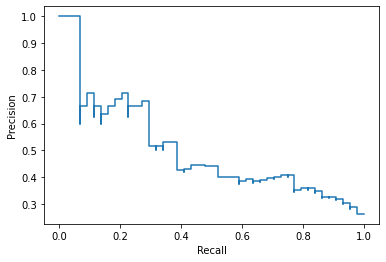

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

y_score = clf.decision_function(X_test)
y_log_proba = clf.predict_log_proba(X_test)
y_proba = clf.predict_proba(X_test)
prec, recall, _ = precision_recall_curve(y_test,
                                         y_score,
                                         pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### 2. Supervised Classifer SVM
reference
1. [Sklearn - Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)
2. [SVM: Maximum margin separating hyperplane](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py)

We first create a toy dataset:

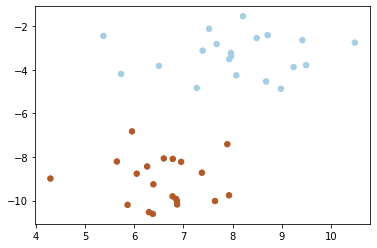

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)
#%%
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

then we construct a SVM estimator, and feed it with our toy dataset:

In [ ]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)  # ~ no L2 Penalty
clf.fit(X, y)

SVC(C=1000, kernel='linear')

now the SVM estimator has been trained. But how do we know what the trained SVM estimator will perform on arbitrary data?
We may want to visualize the hyper-dimension space. 

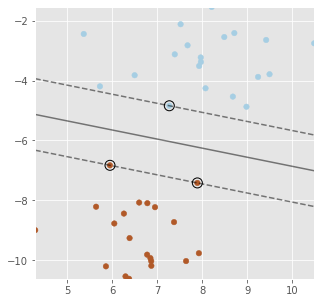

In [ ]:
# create grid to evaluate model
xx = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 30)
yy = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

from matplotlib import pyplot as plt
import numpy as np
plt.style.use('ggplot')
fig, axs = plt.subplots(1, 1, figsize=(5, 5), squeeze=False)
ax = axs[0][0]

# plot dataset
ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot decision boundary and margins
ax.contour(XX,
           YY,
           Z,
           colors="k",
           levels=[-1, 0, 1],
           alpha=0.5,
           linestyles=["--", "-", "--"])

# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()
